In [1]:
from pathlib import Path
import sys
sys.path.append("c:\\Users\\kpdav\\machine_learning\\projects\\PGA-portfolio-optimizer\\config")
sys.path.append("c:\\Users\\kpdav\\machine_learning\\projects\\PGA-portfolio-optimizer\\src\\data")

import config

import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
timeseries_feature_path = str(Path(config.TIMESERIES_FRAMEWORK_DIR, "ts_feature_store.csv"))
df = pd.read_csv(timeseries_feature_path, parse_dates=["date"])

### __Abstract__ 

Daily Fantasy sports (DFS) allow contestants to draft a lineup of players to try and earn the most points from in-game performances by players. Draftkings rewards payouts to the top-ranking contestants. Draftkings is a company that provides a platform for customers to compete in these weekly contests and the one that I will be using to conduct my research. There are different contestants regarding payout structure and player scoring rules for each sport offered by Draftkings. I will focus on golf and the classic style scoring rules with a top-heavy payout structure.

### __Summary of Fantasy Total Points__

I will start by looking at Fantasy total points (FTP) which is the target variable of my dataset and thus an important one to understand. The three components of FTP are hole scoring points, streak bonuses, and fantasy placing points. Hole scoring points is the number of points per hole a golfer receives over the tournament. They consist of four rounds and eighteen holes per round. DraftKings has a fantasy point mapping for each type of score a player can get. The table below shows the different scores a player can receive for every hole. 

|__Score Type__ | __Fantasy Points__ |
| :- | :- |
| Double eagle or better | 13 |
| Eagle | 8 |
| Birdie | 3 |
| Par | 0.5 |
| Bogey | -0.5 |
| Double or worse | -1|


The second component is streak bonuses. A player can score hole scoring points over consecutive holes, rounds, and the entire tournament. The table below details the different streak bonuses that a player can receive and their corresponding point value.



|__Streak Bonuses__ | __Fantasy Points__ |
| :- | :- |
| Streak of 3 Birdies or Better {Max 1 Per Round} | 3 |
| Bogey Free Round | 3 |
| All 4 Rounds Under 70 Strokes | 5 |
| Hole In One | 5 |


The last component is placing points. Placing points are the final position of a player at the end of the tournament. Only the top 50 players receive points and, the rewards decrease exponentially. The point totals are in the table below.

|__Place Position__ | __Fantasy Points__ |
| :- | :- |
| 1st | 30  |
|2nd | 20  |
|3rd | 18  |
|4th | 16  |
|5th | 14  |
|6th | 12  |
|7th | 10  |
|8th|9 |
|9th|8 |
|10th|7 |
|11th – 15th|6 |
|16th – 20th|5 |
|21st – 25th|4 |
|26th – 30th|3 |
|31st – 40th|2 |
|41st – 50th| 1 |



__Fantasy Scoring Notes__

- Ties for a finishing position will not reduce or average down points. For example, if 2 golfers tie for 3rd place, each will receive the 18 fantasy points for the 3rd place finish result.


- Playoff Holes will not count towards final scoring, with the exception of the "finishing position" scoring. For example, the golfer who wins the tournament will receive the sole award of 1st place points, but will not accrue points for their scoring result in the individual playoff holes.
Golfers will receive fantasy points for all completed holes that we receive statistics for. If a golfer withdraws or is disqualified before completing a round, the golfer will receive fantasy points for all holes completed in that round that we receive statistics for. However, golfers who withdraw or are disqualified will not be eligible for a finishing position bonus.

- Golfers must complete 18 holes to be eligible for a bogey free round bonus. If a round is shortened to less than 18 holes, no golfers will be eligible for the bonus in that round. If a golfer is disqualified after a round, that golfer is still eligible for the bogey free round bonus.

- Golfers must complete four 18 hole rounds to be eligible for the all 4 rounds under 70 strokes bonus. If a tournament is shortened to less than 4 rounds or a round is shortened to less than 18 holes, no golfers will be eligible for the bonus. If a tournament is more than 4 rounds, no golfers will be eligible for the bonus


In [3]:
draftkings_fantasy_columns = ["fantasy_placing_pts",
                        "fantasy_hole_score_pts", 
                        "fantasy_bogeyfree_pts", 
                        "fantasy_hole_in_one_pts", 
                        "fantasy_birdie_streak_pts", 
                        "fantasy_under70_pts"]

all_draftkings_fantasy_columns = ["fantasy_placing_pts", 
                        "fantasy_hole_score_pts", 
                        "fantasy_bogeyfree_pts",
                        "fantasy_hole_in_one_pts", 
                        "fantasy_birdie_streak_pts",
                        "fantasy_under70_pts",
                        "fantasy_total_points"]

fantasy_point_contributions = df[draftkings_fantasy_columns] / df["fantasy_total_points"].values[0]



In [4]:
fantasy_point_contributions = fantasy_point_contributions.rename(columns={"fantasy_placing_pts":"place",
                        "fantasy_hole_score_pts":"hole_score", 
                        "fantasy_bogeyfree_pts":"bogey_free", 
                        "fantasy_hole_in_one_pts": "hole_in_one", 
                        "fantasy_birdie_streak_pts": "birdie_strk", 
                        "fantasy_under70_pts": "under_70"})

In [5]:
fantasy_point_contributions.sort_values(by="hole_score", ascending=False)

place  hole_score  bogey_free  hole_in_one  birdie_strk  under_70
1057   0.952381    3.761905    0.095238          0.0     0.190476   0.15873
12654  0.952381    3.650794    0.095238          0.0     0.095238   0.15873
16836  0.952381    3.571429    0.095238          0.0     0.190476   0.15873
16310  0.507937    3.571429    0.095238          0.0     0.095238   0.15873
10663  0.952381    3.539683    0.095238          0.0     0.190476   0.15873
...         ...         ...         ...          ...          ...       ...
15059  0.000000   -0.079365    0.000000          0.0     0.000000   0.00000
5170   0.000000   -0.079365    0.000000          0.0     0.000000   0.00000
1861   0.000000   -0.079365    0.000000          0.0     0.000000   0.00000
9605   0.000000   -0.095238    0.000000          0.0     0.000000   0.00000
5168   0.000000   -0.126984    0.000000          0.0     0.000000   0.00000

[17750 rows x 6 columns]

In [6]:

fig = px.box(fantasy_point_contributions,
            labels={
                "value" : "Point Contribution",
                "variable": "Point Scoring Type"
            },
            title="Fantasy Point Scoring Type Breakdown")
fig.show()

From above, we can see that the hole score makes up the majority of points for players. The distribution of hole score is negatively skewed, which makes sense given that tournaments have a cutline after two rounds. Only the top 75 players continue to play for the final two rounds. More opportunities to score points and have the chance to win the tournament. The cut line also explains the box plot of the place variable. The outlier points come from the small proportion of players who place. Since only 50 players that made the cut receive points that decrease exponentially.

To visualize the weightings of each fantasy point scoring type differently, the plot below clearly shows (in an unpleasant manner) the dominance of the hole score variable.

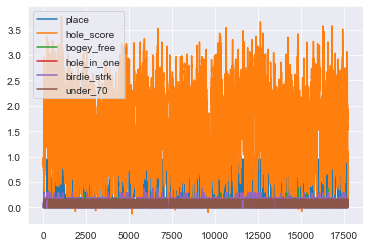

In [7]:
fantasy_point_contributions.plot();

Next I will display the distribution of the target variable and try to gain insights.

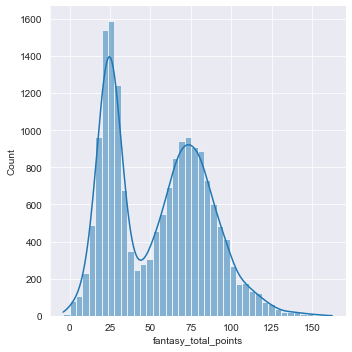

In [8]:
sns.displot(df, x="fantasy_total_points", kde=True);

The fantasy total points distribution is bimodal. The lower peak is more narrow, while the higher peak is more dispersed. Earlier I noted the effects of getting cut and the opportunities players have to score more points. These opportunities lead to separation from the cut players and variance among the remaining players.

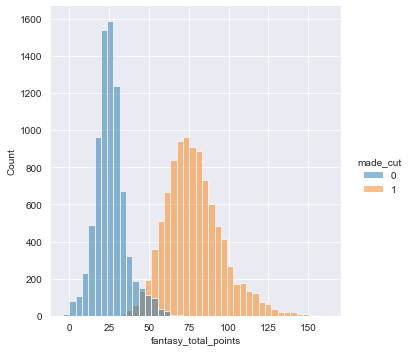

In [9]:
sns.displot(df, x="fantasy_total_points", hue="made_cut");

There are almost two disjoint sets that stem from getting cut. Players are gaining more fantasy points by playing more rounds in the tournament.


Now I will compare places and made cut as they are the closest categorical variables in the dataset. Since I have filled all players who did not make the cut with a fixed value, I will choose to inspect fantasy placing points instead since it is just a fantasy point mapping.

In [10]:
place_mask = df["fantasy_placing_pts"].notna()

categorical_df = df[["fantasy_placing_pts", "made_cut"]][(place_mask) | (df["made_cut"])]


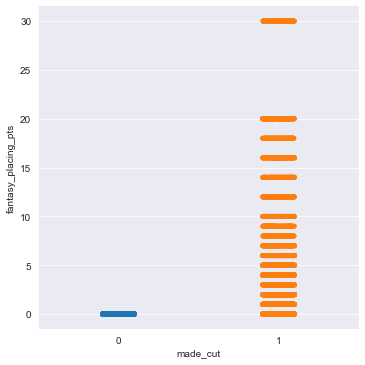

In [13]:
sns.catplot(x="made_cut", y="fantasy_placing_pts", data=categorical_df);

In [12]:
pd.crosstab(df["fantasy_placing_pts"], df["made_cut"])

made_cut                0     1
fantasy_placing_pts            
0                    7853  2728
1                       0  1330
2                       0  1267
3                       0   733
4                       0   681
5                       0   770
6                       0   755
7                       0   186
8                       0   130
9                       0   142
10                      0   162
12                      0   169
14                      0   172
16                      0   166
18                      0   160
20                      0   206
30                      0   140

Again, we can see how distinct getting cut plays in fantasy placing points. As stated earlier, cut players don't have a chance to finish in the tournament and miss out on scoring opportunities.